## Good afternoon everyone

# Multiple Linear Regression Model / Linear Regression with Multiple Variables/Features/Attributes
A linear regression model that contains more than one predictor variable is called a multiple linear regression model. The following model is a multiple linear regression model with two predictor variables, ***$X_1$*** and ***$X_2$***.
then

**$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon$**

Y = M*x + C

Y = m1*x1 + m2*x2 + m3 * x3 ........ mn * xn + c + error



m1, m2,m3,m4 ...... mn

## [Datasets Link](https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/FuelConsumptionCo2.csv)

## [Datasets Description](https://www.kaggle.com/gangliu/oc2emission)

In [1]:
import pandas as pd

fuel = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/FuelConsumptionCo2.csv')
fuel.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [3]:
fuel['MAKE']

0       ACURA
1       ACURA
2       ACURA
3       ACURA
4       ACURA
        ...  
1062    VOLVO
1063    VOLVO
1064    VOLVO
1065    VOLVO
1066    VOLVO
Name: MAKE, Length: 1067, dtype: object

In [5]:
fuel.shape

(1067, 13)

In [4]:
fuel['MAKE'].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
AUDI             49
GMC              49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
BUICK            16
MITSUBISHI       16
RAM              13
ACURA            12
LINCOLN          11
VOLVO            11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SRT               2
SMART             2
Name: MAKE, dtype: int64

In [7]:
fuel['MAKE'].value_counts().count()

39

In [6]:
fuel['MODEL'].value_counts()

F150 FFV                 8
F150 FFV 4X4             8
FOCUS FFV                6
BEETLE                   6
ACCORD                   6
                        ..
911 TURBO CABRIOLET      1
RAV4 LIMITED AWD         1
F-TYPE CONVERTIBLE       1
1500 DIESEL              1
RANGE ROVER V8 5.0 SC    1
Name: MODEL, Length: 663, dtype: int64

In [8]:
fuel['VEHICLECLASS'].value_counts()

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

In [12]:
fuel['VEHICLECLASS'].value_counts().count()

16

In [13]:
fuel['CYLINDERS'].value_counts()

4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64

In [14]:
fuel['ENGINESIZE'].min()

1.0

In [15]:
fuel['ENGINESIZE'].max()

8.4

In [16]:
fuel['ENGINESIZE'].argmax()

940

In [17]:
fuel.iloc[940]

MODELYEAR                          2014
MAKE                                SRT
MODEL                       VIPER COUPE
VEHICLECLASS                 TWO-SEATER
ENGINESIZE                          8.4
CYLINDERS                            10
TRANSMISSION                         M6
FUELTYPE                              Z
FUELCONSUMPTION_CITY                 20
FUELCONSUMPTION_HWY                  13
FUELCONSUMPTION_COMB               16.9
FUELCONSUMPTION_COMB_MPG             17
CO2EMISSIONS                        389
Name: 940, dtype: object

In [18]:
fuel['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [19]:
fuel['FUELCONSUMPTION_CITY'].max()

30.2

In [20]:
fuel['FUELCONSUMPTION_CITY'].argmax()

228

In [21]:
fuel.iloc[228]

MODELYEAR                                     2014
MAKE                                     CHEVROLET
MODEL                       EXPRESS 3500 PASSENGER
VEHICLECLASS                       VAN - PASSENGER
ENGINESIZE                                       6
CYLINDERS                                        8
TRANSMISSION                                    A6
FUELTYPE                                         E
FUELCONSUMPTION_CITY                          30.2
FUELCONSUMPTION_HWY                           20.5
FUELCONSUMPTION_COMB                          25.8
FUELCONSUMPTION_COMB_MPG                        11
CO2EMISSIONS                                   413
Name: 228, dtype: object

In [22]:
fuel.iloc[fuel['FUELCONSUMPTION_HWY'].argmax()]

MODELYEAR                                     2014
MAKE                                     CHEVROLET
MODEL                       EXPRESS 3500 PASSENGER
VEHICLECLASS                       VAN - PASSENGER
ENGINESIZE                                       6
CYLINDERS                                        8
TRANSMISSION                                    A6
FUELTYPE                                         E
FUELCONSUMPTION_CITY                          30.2
FUELCONSUMPTION_HWY                           20.5
FUELCONSUMPTION_COMB                          25.8
FUELCONSUMPTION_COMB_MPG                        11
CO2EMISSIONS                                   413
Name: 228, dtype: object

In [23]:
fuel.iloc[fuel['FUELCONSUMPTION_HWY'].argmin()]

MODELYEAR                            2014
MAKE                                HONDA
MODEL                       ACCORD HYBRID
VEHICLECLASS                     MID-SIZE
ENGINESIZE                              2
CYLINDERS                               4
TRANSMISSION                           AV
FUELTYPE                                X
FUELCONSUMPTION_CITY                  4.7
FUELCONSUMPTION_HWY                   4.9
FUELCONSUMPTION_COMB                  4.8
FUELCONSUMPTION_COMB_MPG               59
CO2EMISSIONS                          110
Name: 487, dtype: object

In [25]:
fuel['CO2EMISSIONS'].min(), fuel['CO2EMISSIONS'].max()

(108, 488)

A+ -> 1
A- -> 2
B+ -> 3
B - -> 4
AB+ -> 5
AB- -> 6

108 - 120 - 1
121 - 140 - 2


In [26]:
import matplotlib.pyplot as plt

In [27]:
fuel.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

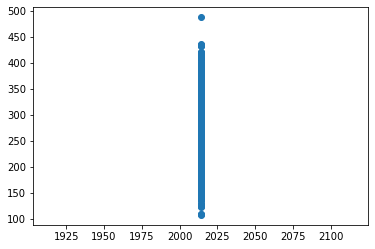

In [29]:
plt.scatter(fuel['MODELYEAR'], fuel['CO2EMISSIONS'])

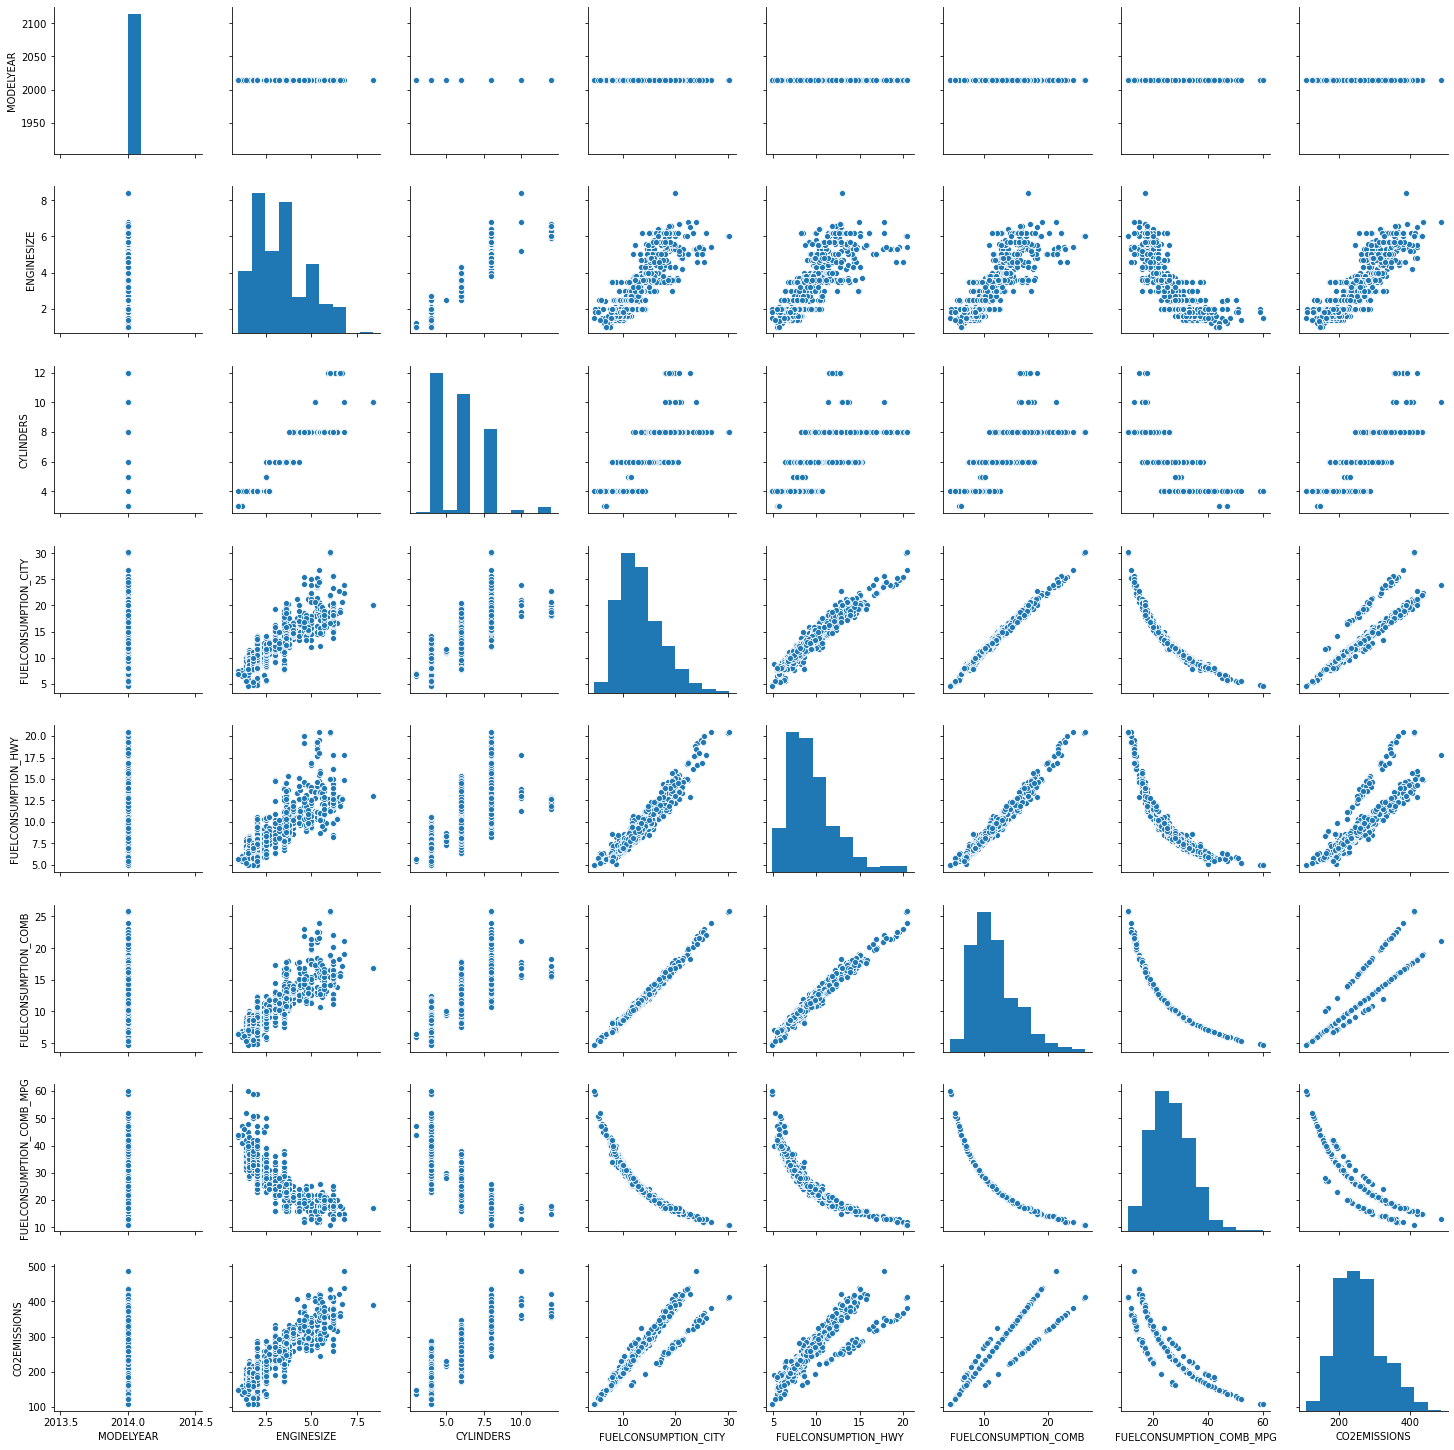

In [30]:
import seaborn as sns

sns.pairplot(fuel)

In [31]:
fuel.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [32]:
reqFeatures = fuel[['ENGINESIZE', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [33]:
sns.pairplot(reqFeatures)

Error in callback <function flush_figures at 0x0000018A112C1280> (for post_execute):


KeyboardInterrupt: 

In [34]:
corr = fuel.corr()
corr

MODELYEAR  ENGINESIZE  CYLINDERS  \
MODELYEAR                       NaN         NaN        NaN   
ENGINESIZE                      NaN    1.000000   0.934011   
CYLINDERS                       NaN    0.934011   1.000000   
FUELCONSUMPTION_CITY            NaN    0.832225   0.796473   
FUELCONSUMPTION_HWY             NaN    0.778746   0.724594   
FUELCONSUMPTION_COMB            NaN    0.819482   0.776788   
FUELCONSUMPTION_COMB_MPG        NaN   -0.808554  -0.770430   
CO2EMISSIONS                    NaN    0.874154   0.849685   

                          FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
MODELYEAR                                  NaN                  NaN   
ENGINESIZE                            0.832225             0.778746   
CYLINDERS                             0.796473             0.724594   
FUELCONSUMPTION_CITY                  1.000000             0.965718   
FUELCONSUMPTION_HWY                   0.965718             1.000000   
FUELCONSUMPTION_COMB                  0.995542             0.985804   
FUELCONSUMPTION_COMB_MPG             -0.935613            -0.893809   
CO2EMISSIONS                          0.898039             0.861748   

                          FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
MODELYEAR                                  NaN                       NaN   
ENGINESIZE                            0.819482                 -0.808554   
CYLINDERS                             0.776788                 -0.770430   
FUELCONSUMPTION_CITY                  0.995542                 -0.935613   
FUELCONSUMPTION_HWY                   0.985804                 -0.893809   
FUELCONSUMPTION_COMB                  1.000000                 -0.927965   
FUELCONSUMPTION_COMB_MPG             -0.927965                  1.000000   
CO2EMISSIONS                          0.892129                 -0.906394   

                          CO2EMISSIONS  
MODELYEAR                          NaN  
ENGINESIZE                    0.874154  
CYLINDERS                     0.849685  
FUELCONSUMPTION_CITY          0.898039  
FUELCONSUMPTION_HWY           0.861748  
FUELCONSUMPTION_COMB          0.892129  
FUELCONSUMPTION_COMB_MPG     -0.906394  
CO2EMISSIONS                  1.000000

In [38]:
x = reqFeatures.drop('CO2EMISSIONS', axis = 1)
y = reqFeatures['CO2EMISSIONS']

In [39]:
x.head()

ENGINESIZE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB
0         2.0                   9.9                  6.7                   8.5
1         2.4                  11.2                  7.7                   9.6
2         1.5                   6.0                  5.8                   5.9
3         3.5                  12.7                  9.1                  11.1
4         3.5                  12.1                  8.7                  10.6

In [40]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

train = 75%
test = 25%


In [41]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [42]:
x_train

ENGINESIZE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
309          3.6                  13.2                  8.7   
319          2.4                  10.6                  7.5   
261          5.3                  16.0                 11.1   
306          5.7                  16.1                 10.0   
737          5.5                  15.1                 10.7   
...          ...                   ...                  ...   
330          3.6                  14.2                  9.4   
466          2.4                  11.5                  8.2   
121          4.4                  16.2                 10.9   
1044         1.8                  10.0                  6.9   
860          5.6                  19.7                 14.3   

      FUELCONSUMPTION_COMB  
309                   11.2  
319                    9.2  
261                   13.8  
306                   13.4  
737                   13.1  
...                    ...  
330                   12.0  
466                   10.0  
121                   13.8  
1044                   8.6  
860                   17.3  

[800 rows x 4 columns]

In [43]:
x_test

ENGINESIZE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
732          4.7                  15.4                 10.4   
657          3.5                  11.3                  7.6   
168          3.6                  15.1                  9.9   
86           3.0                  11.4                  7.3   
411          2.0                  10.5                  7.1   
...          ...                   ...                  ...   
110          4.4                  15.0                  9.8   
453          4.3                  13.4                  9.9   
554          5.0                  15.7                 10.3   
700          3.7                  14.3                 10.6   
1022         2.0                  10.8                  7.6   

      FUELCONSUMPTION_COMB  
732                   13.2  
657                    9.6  
168                   12.8  
86                     9.6  
411                    9.0  
...                    ...  
110                   12.7  
453                   11.8  
554                   13.3  
700                   12.6  
1022                   9.4  

[267 rows x 4 columns]

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
mlr = LinearRegression()

In [48]:
mlr.fit(x_train, y_train)

LinearRegression()

In [52]:
x_test.iloc[0, :]

ENGINESIZE               4.7
FUELCONSUMPTION_CITY    15.4
FUELCONSUMPTION_HWY     10.4
FUELCONSUMPTION_COMB    13.2
Name: 732, dtype: float64

In [54]:
y.iloc[0]

196

In [55]:
mlr.predict([[4.7, 15.4, 10.4, 13.2]])

array([299.12449791])

In [58]:
1 - mlr.score(x_train, y_train)

0.14332101169339562

In [59]:
mlr.score(x_test, y_test)

0.8659408158406949